# Employee Retention Data Challenge

# Executive Summary

**Key Takeaways**

* Companies 1&2 pay higher salaries. Companies 11&12 have lower paying salaries. Beyond that the salary distribution among companies looks uniform.

* There seniority structure seem t be inverted. Company 11 seems to have many employees at a higher seniority level and Company 12 has many employees with low seniority.

* It appears that each company has a large number of employees in customer service. Design teams tend to be small. Companies 11&12 appear to be very small and contain very few employees, possibly a startup. The makeup of employees by department looks similar between companies scaled by size.

* Distribution of seniority and duration similar across departments.

* Engineering and Data Science have similar distributions and are the highest salaried positions. Design, marketing, and sales also have similar distributions. Customer service is the most abundant department in terms of number of employees, but also the lowest salaried department. This could be a location for high churn.

* Seniority results in a higher salary. Salary distribution is binned into three steps 0-5 years, 5-15 years, 15+ years.


**Additional Features to add to Dataset**

* Age
* Commute time
* Education
* Job satisfaction
* Work life balance
* Time since last promotion
* Time with current manager

# Data Challenge: Employee Retention Study

## Background

Employee turnover is very costly to companies and results in increased recruiting costs and a loss of productivity for many months. We need to understand why and when employees are leaving and provide tangible data driven recommendations to the CFO and other stakeholders to remedy this problem.

## Questions

1. What are the main factors driving employee churn?
2. Who and when are employees most likely to quit?
3. What interventions could the company make to remedy churn?

# Data Preparation

### Import Packages and load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("employee_retention.csv", index_col=0)

### Inspect data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  34702 non-null  float64
 1   company_id   34702 non-null  int64  
 2   dept         34702 non-null  object 
 3   seniority    34702 non-null  int64  
 4   salary       34463 non-null  float64
 5   join_date    34702 non-null  object 
 6   quit_date    23510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


* I will need to convert `join_date` and `quit_date` to datetime objects.

In [5]:
df.describe()

,employee_id,company_id,seniority,salary
count,3.470200e+04,34702.000000,34702.000000,34463.000000
mean,6.466667e+05,4.023370,10.056625,100280.585004
std,3.337653e+05,2.911201,9.355505,87322.502536
min,3.600000e+01,1.000000,0.000000,5000.000000
25%,3.529228e+05,1.000000,0.000000,9302.000000
50%,7.063230e+05,3.000000,8.000000,88000.000000
75%,1.001324e+06,6.000000,18.000000,158000.000000
max,1.009999e+06,12.000000,99.000000,408000.000000


In [6]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


* It seems that the data columns have non-uniform entries, will want to clean these and convert to datetime object

In [7]:
df.join_date = pd.to_datetime(df.join_date, errors='coerce')

In [8]:
df.quit_date = pd.to_datetime(df.quit_date, errors='coerce')

In [9]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  34702 non-null  float64       
 1   company_id   34702 non-null  int64         
 2   dept         34702 non-null  object        
 3   seniority    34702 non-null  int64         
 4   salary       34463 non-null  float64       
 5   join_date    34702 non-null  datetime64[ns]
 6   quit_date    23510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 2.1+ MB


* The datetime conversion dealt with the non-uninform date entry. Now explore missing values and duplicates.

### Explore missing data and duplicates

In [11]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary           239
join_date          0
quit_date      11192
dtype: int64

* It appears there are a lot of missing values in salary and also quit date. This will need to be explored. Another look at the data reveals that quit date is NA, indicates that employees are still actively working for the company. We can assume that employers maintain accurate records of current and past employees.

In [12]:
df.isna().mean(axis=0)

employee_id    0.000000
company_id     0.000000
dept           0.000000
seniority      0.000000
salary         0.006887
join_date      0.000000
quit_date      0.322517
dtype: float64

* The missing values in salary are pretty small so we can drop these. We can also see that 32% of people hired are still with the company

In [13]:
df= df.dropna(subset=['salary']) #Removes NA from salary only

* Since employees that still work with the companies, we will set the "quit date" to the end of the reporting period "2015/12/13"

In [14]:
df = df.fillna('2015-12-13')

# Convert quit date to datetime object again

In [15]:
df.quit_date = pd.to_datetime(df.quit_date)

In [16]:
df.isna().mean(axis=0)

employee_id    0.0
company_id     0.0
dept           0.0
seniority      0.0
salary         0.0
join_date      0.0
quit_date      0.0
dtype: float64

#### Plot histograms to visually explore counts of different variables

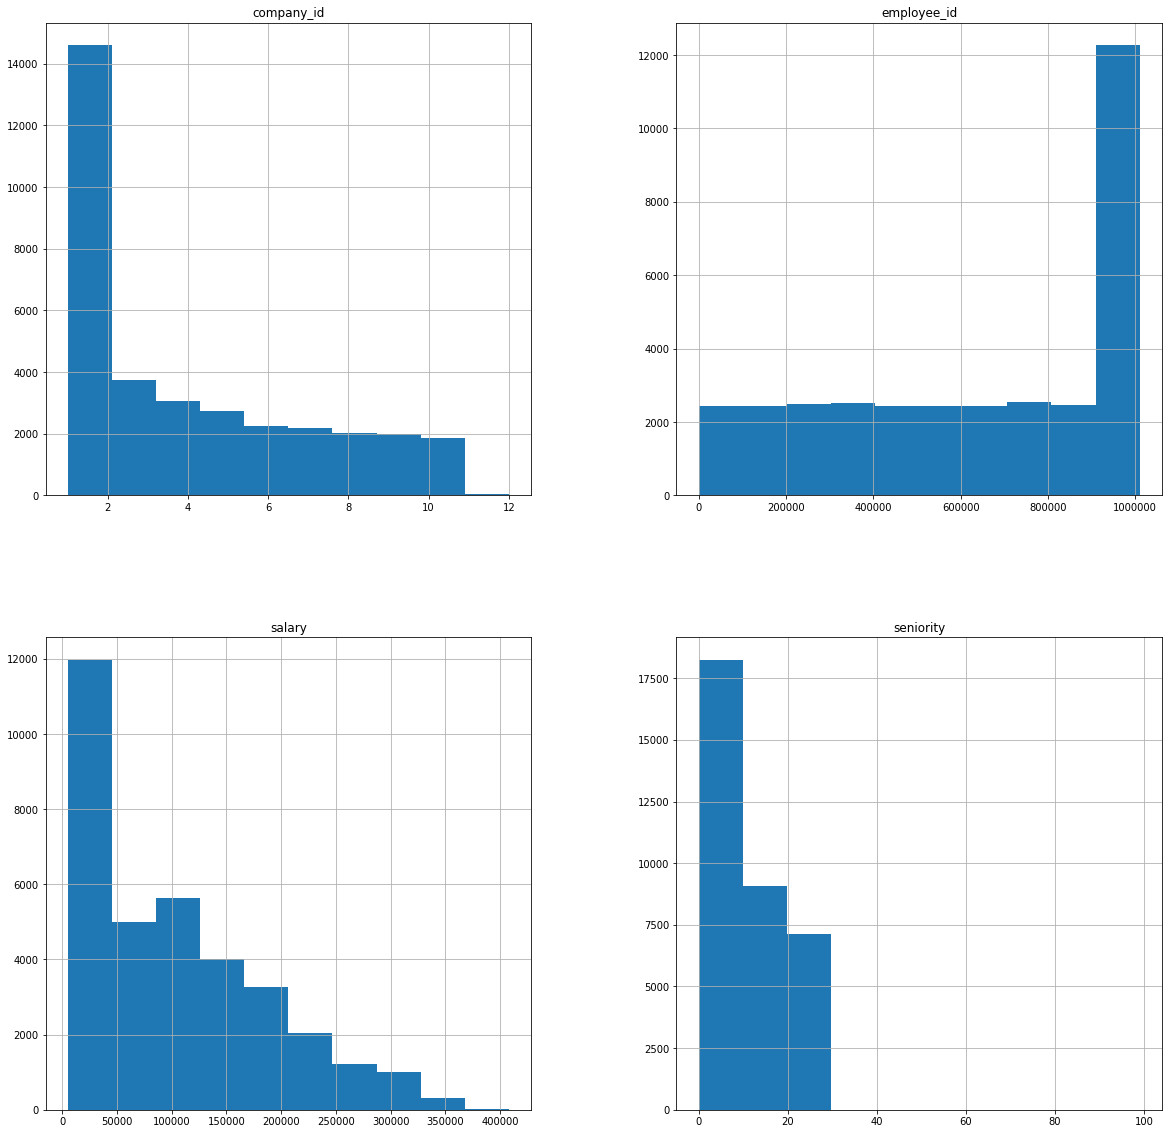

In [17]:
df.hist(figsize=(20,20))
plt.show()

* Looking at the distriubtion of salary we can see that the majority of employees make less than 150,000. In terms of seniority, it seems that there are quite a few lower level employees.

#### Explore Join and Quit dates

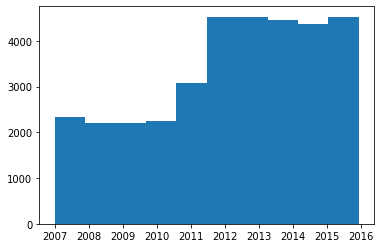

In [18]:
plt.hist(df.join_date)
plt.show()

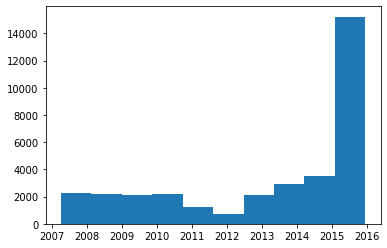

In [19]:
plt.hist(df.quit_date)
plt.show()

In [20]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


* Our data contains dates outside of the observation period of interest. We are only focusing on 2011/01/24 to present. I will remove dates that fall before the reporting period. Also, temporary contractors by nature are temporary, so they will also have to be removed.

In [21]:
df = df[df.join_date > '2011-01-24']
df= df[df.quit_date > '2011-01-24']

In [22]:
df['dept'].unique()

array(['design', 'engineer', 'marketing', 'customer_service',
       'data_science', 'sales'], dtype=object)

* Interesting, after 2011-01-24 there were no temporary contractors. It appears the company started staffing full-time employees at that point.

* Now that we have a better sense of join and quit date, we will want to calculate a new variable containing the duration of each employees time with the companies know as "duration". This will be helpful for visualization later.

In [23]:
df['duration'] = (df.quit_date-df.join_date).apply(lambda x: getattr(x, 'days'))

In [24]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,1110
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,662
5,287530.0,5,marketing,20,180000.0,2014-06-30,2015-12-13,531
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,634


# EDA

We need to get a better understanding of how department, seniority, and salary affect employee duration. Specifically, some questions to explore:

1. How do companies differ in the distribution of salary, seniority, department, and duration.
2. How do departments differ in the distribution of salary, seniority, and duration.
3. How does individual employee duration vary by seniority and salary.

## Companies

### Salary

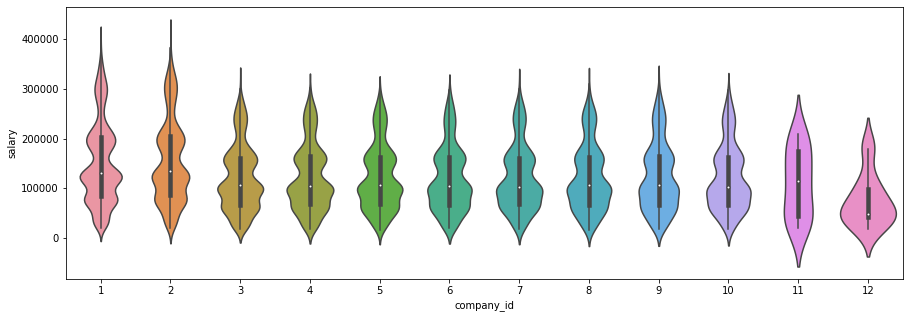

In [25]:
plt.figure(figsize=(15,5))
sns.violinplot(x="company_id", y="salary", data=df)

* Companies 1&2 pay higher salaries. Companies 11&12 have lower paying salaries. Beyond that the salary distrubtion among companies looks uniform.

### Seniority

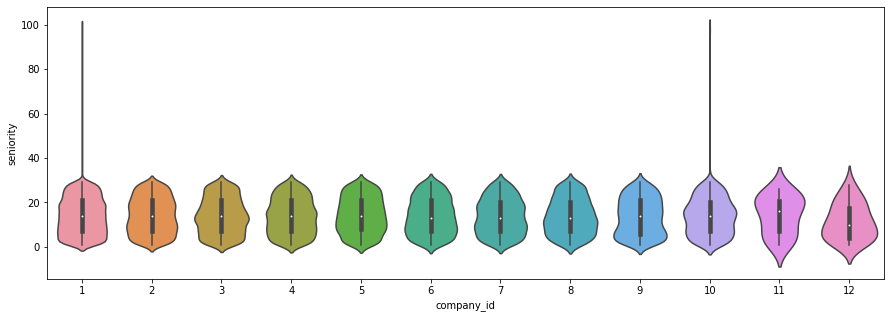

In [26]:
plt.figure(figsize=(15,5))
sns.violinplot(x="company_id", y="seniority", data=df)

* Ok. It appears we have some outliers in companies 1 and 10 which will need to be removed. Most companies look similar except companies 11&12. There seniority structure seem t be inverted. Company 11 seems to have many employees at a higher seniority level and Company 12 has many employees with low seniority. These companies are both very small and that can exaggerate the appearance of the plots.

In [27]:
df.seniority.value_counts() 

8     992
12    976
6     939
9     930
2     927
16    924
5     921
10    918
11    917
7     916
14    908
19    900
15    898
4     885
13    883
17    877
3     867
18    856
1     854
20    836
23    780
21    767
22    756
24    733
25    704
26    681
27    634
29    623
28    578
99      1
98      1
Name: seniority, dtype: int64

* It appears there are some outliers. Will remove 98 and 99

In [28]:

df = df[df.seniority < 98]

### Explore employee counts by company and department

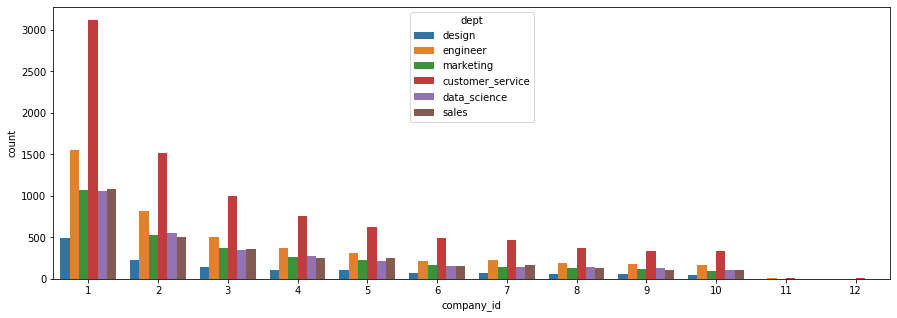

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="company_id", hue="dept", data=df)


* It appears that each company has a large number of employees in customer service. Design teams tend to be small. Companies 11&12 appear to be very small and contain very few employees, possibly a startup. The makeup of employees by department looks similar between companies scaled by size.

### Duration

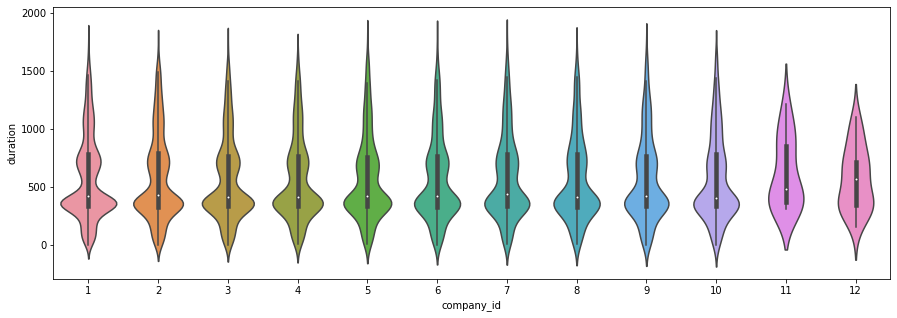

In [30]:
plt.figure(figsize=(15,5))
sns.violinplot(x="company_id", y="duration", data=df)

* All companies appear to be pretty similar with the exception of companies 11 & 12. They appear to have longer duration of employment than other companies.

## Departments

### Salary

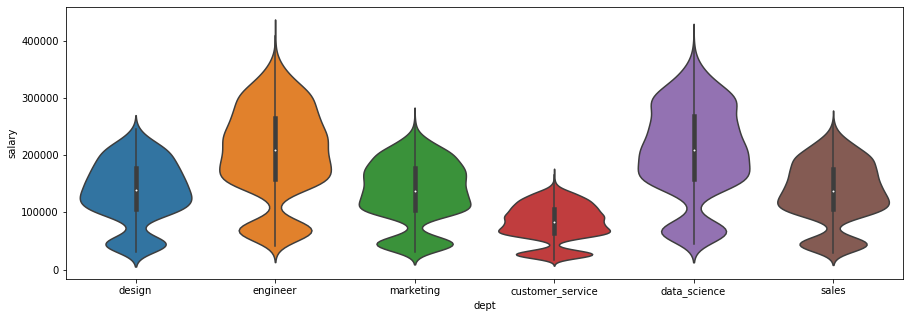

In [31]:
plt.figure(figsize=(15,5))
ax = sns.violinplot(x="dept", y="salary", data=df, scale = 'width')

* Engineering and Data Science have similar distributions and are the highest salaried positions. Design, marketing, and sales also have similar distributions. Customer service is the most abundant department in terms of number of employees, but also the lowest salaried department. This could be a location for high churn. Explore further.

### Seniority

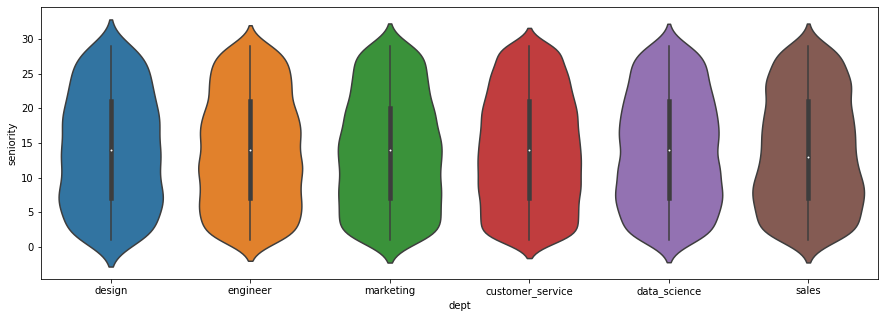

In [32]:
plt.figure(figsize=(15,5))
ax = sns.violinplot(x="dept", y="seniority", data=df)

* The distribution of seniority structures looks pretty similar across the various departments.

### Duration

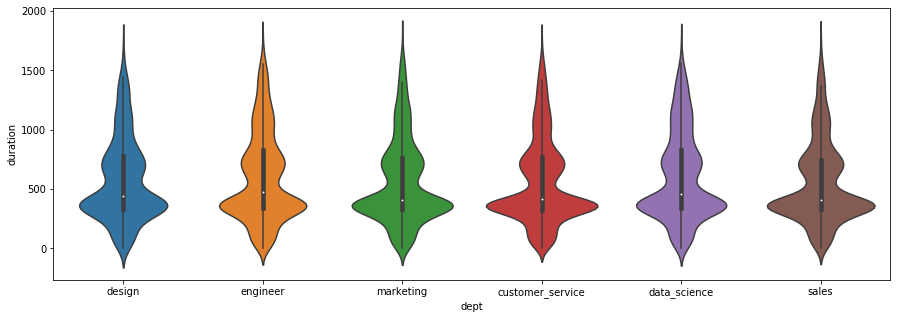

In [33]:
plt.figure(figsize=(15,5))
ax = sns.violinplot(x="dept", y="duration", data=df)

* The distribution of duration looks relatively uniform across departments as well.

## Individual Employee Duration

### Seniority

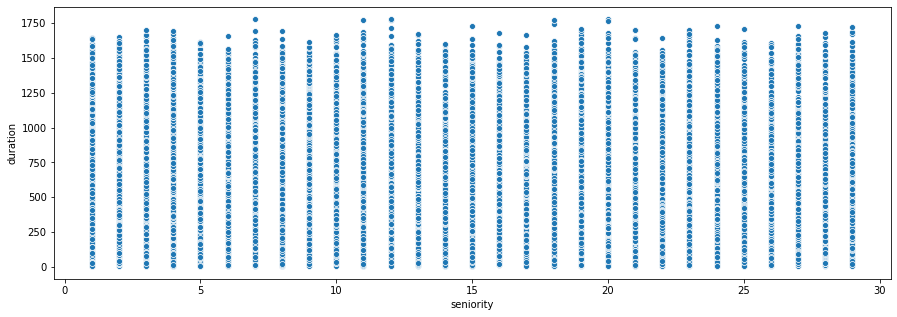

In [34]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x="seniority", y="duration",
                     data=df)

* Unable to discern a pattern or signal here.

### Salary

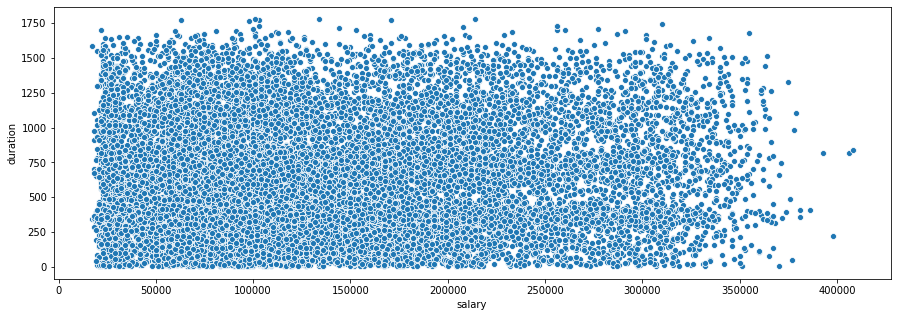

In [35]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x="salary", y="duration",
                     data=df)

* This is also not yielding an useful insights.

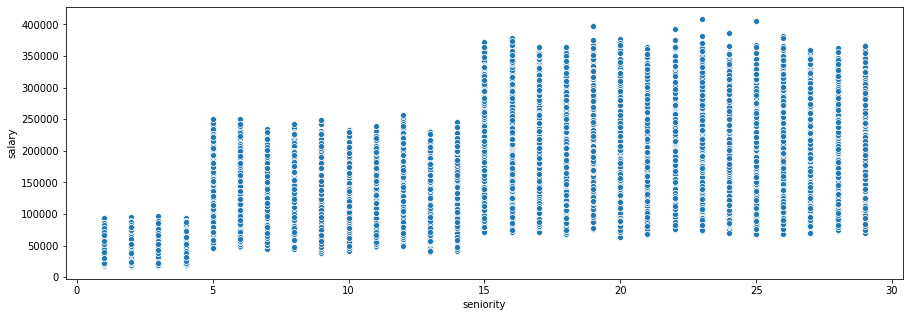

In [37]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x="seniority", y="salary",
                     data=df)

* Higher seniority = higher salary
    
* 3 steps : 0-5, 5-15, 15+
